In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('city_day.csv', parse_dates=['Date'])
print(df.info())
print(df.head())
print("\nMissing values before filling:\n", df.isnull().sum())

#forward fill, then backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Verifying
print("\nMissing values after filling:\n", df.isnull().sum())

# General Stats
print("\nSummary statistics of the dataset:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3813906049.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3813906049.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [27]:
print(df.columns.tolist())

['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3877400806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AQI', y='City', data=citywise_aqi.head(10), palette='coolwarm')


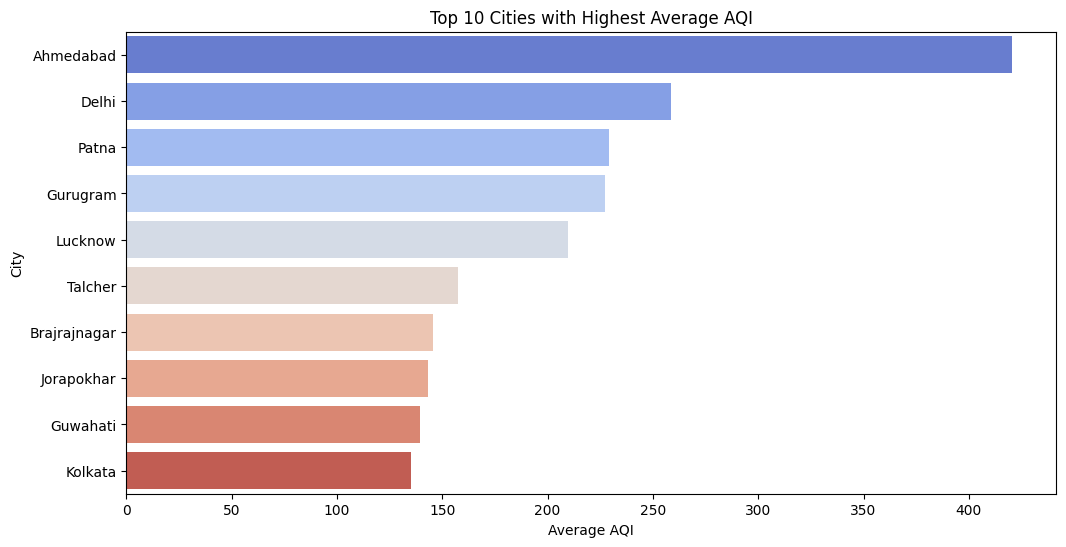

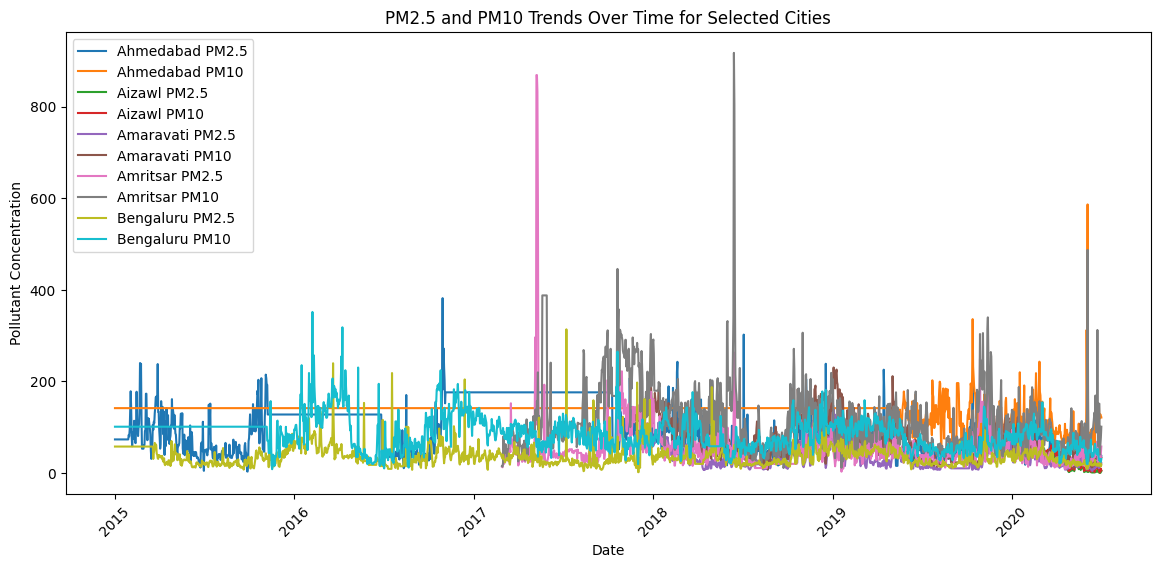

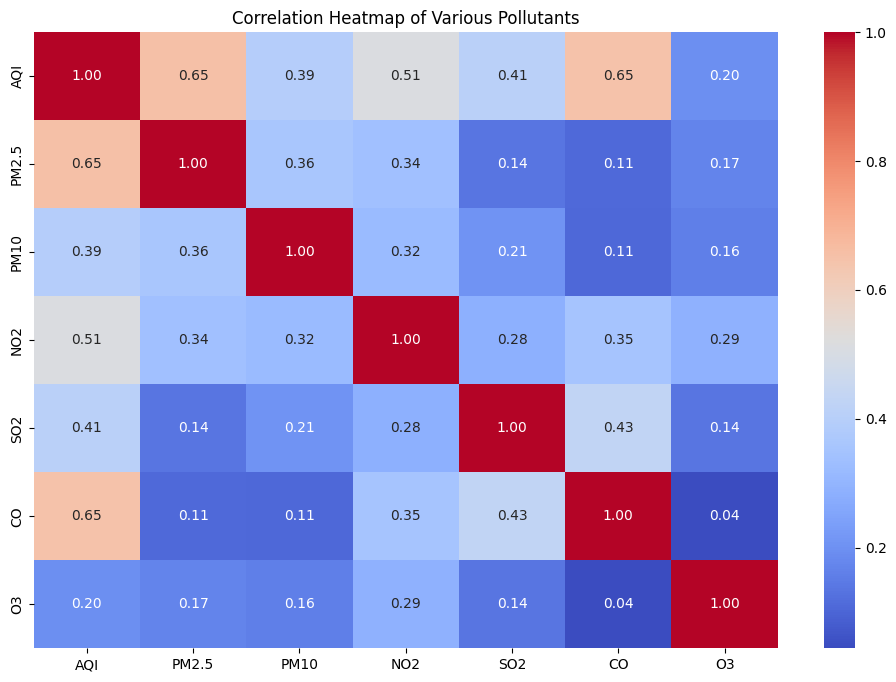

C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3877400806.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df.resample('M')['AQI'].mean()


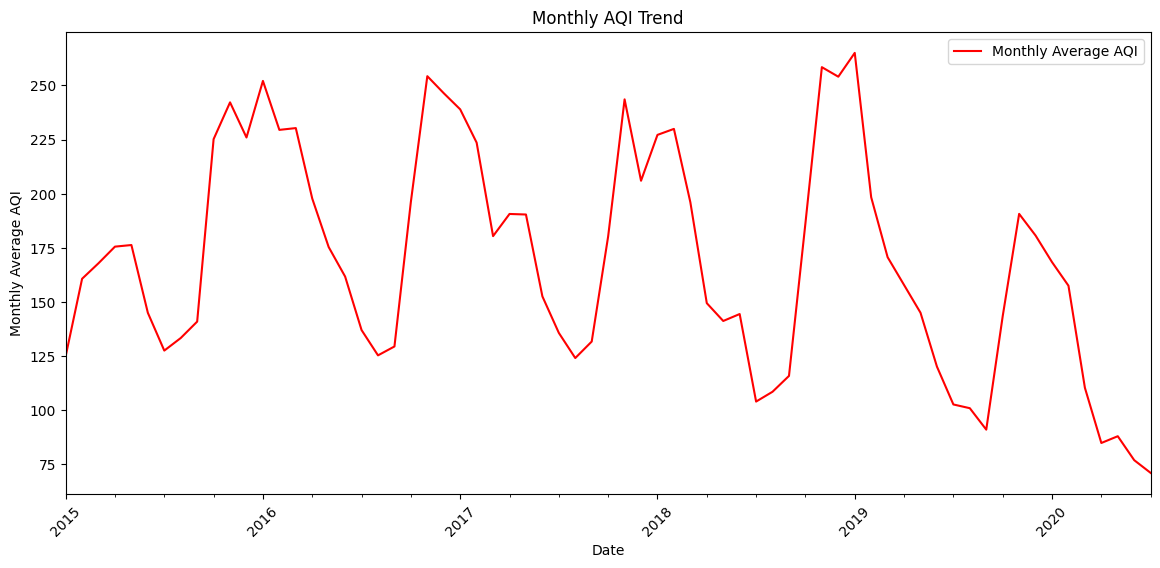

C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3877400806.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df, palette='viridis')


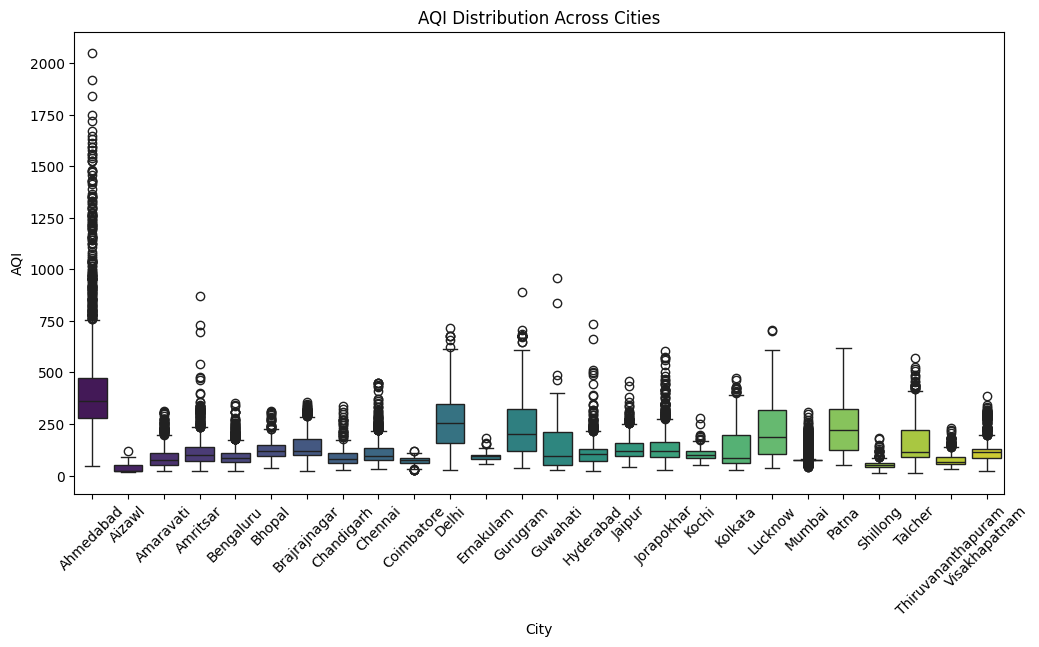

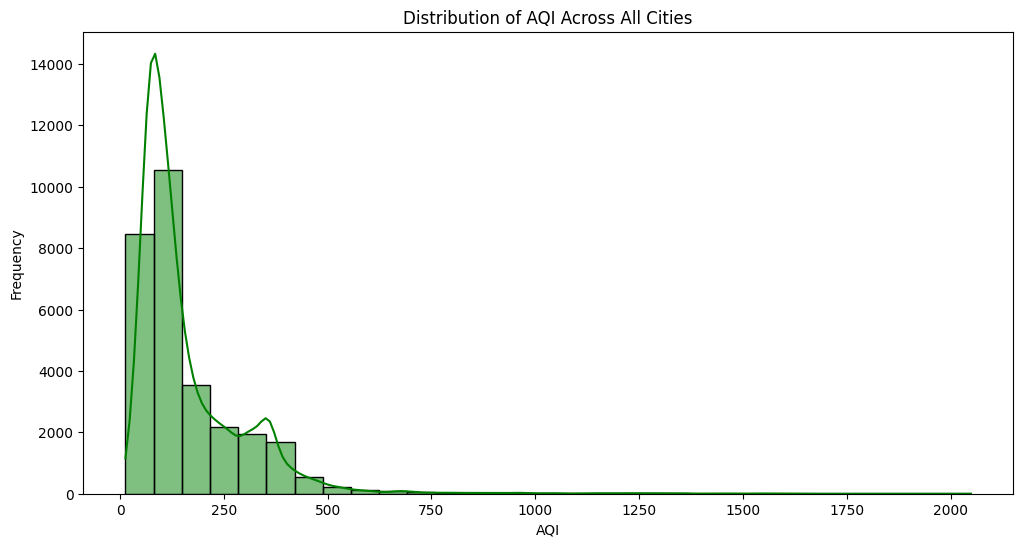

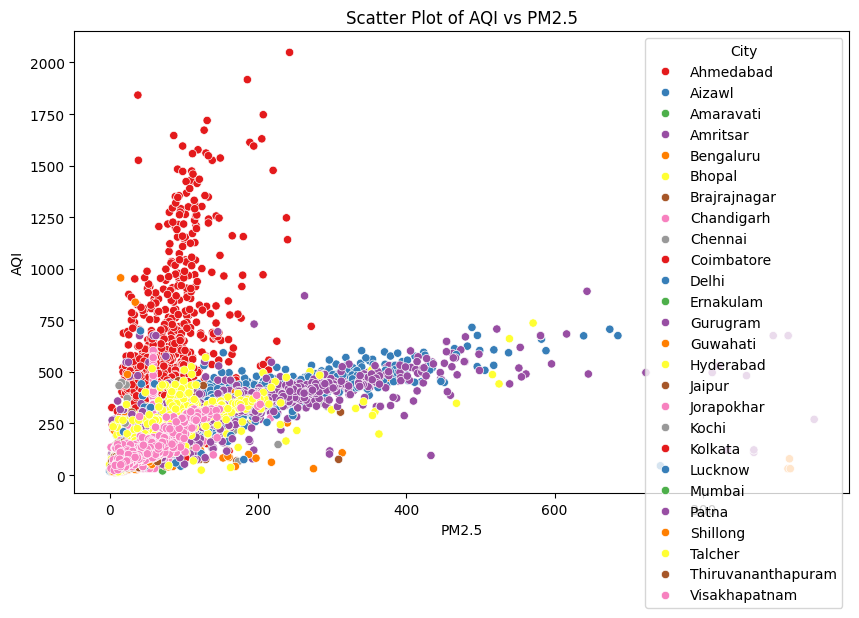

C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\3877400806.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='PM2.5', data=df, palette='coolwarm')


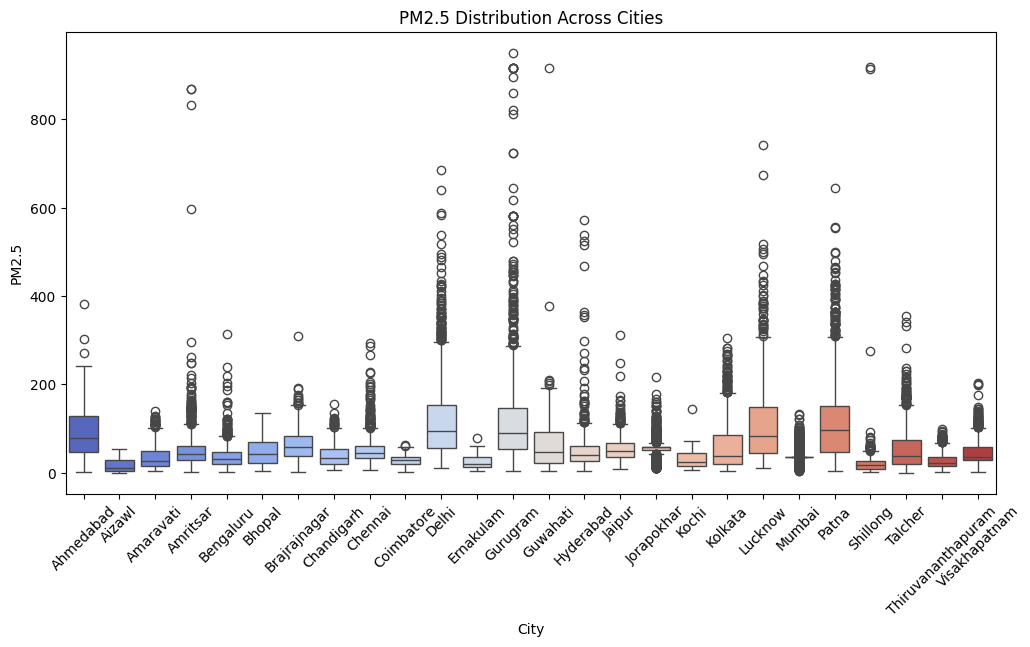

In [28]:
#  City-wise AQI comparison 
# Average AQI for each city
citywise_aqi = df.groupby('City')['AQI'].mean().reset_index().sort_values(by='AQI', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='AQI', y='City', data=citywise_aqi.head(10), palette='coolwarm')
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.title('Top 10 Cities with Highest Average AQI')
plt.show()

# Trend of PM2.5, PM10 over time
plt.figure(figsize=(14, 6))
for city in df['City'].unique()[:5]:
    city_df = df[df['City'] == city].groupby('Date')[['PM2.5', 'PM10']].mean()
    plt.plot(city_df.index, city_df['PM2.5'], label=f'{city} PM2.5')
    plt.plot(city_df.index, city_df['PM10'], label=f'{city} PM10')

plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('PM2.5 and PM10 Trends Over Time for Selected Cities')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# correlations between pollutants
plt.figure(figsize=(12, 8))
sns.heatmap(df[['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Various Pollutants')
plt.show()

# Monthly AQI comparison
# Set Date as index and resample for monthly averages
df.set_index('Date', inplace=True)
monthly_aqi = df.resample('M')['AQI'].mean()

plt.figure(figsize=(14, 6))
monthly_aqi.plot(label='Monthly Average AQI', color='r')
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.title('Monthly AQI Trend')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#City-wise boxplot for AQI 
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='AQI', data=df, palette='viridis')
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()

# AQI Distribution (Histogram)
plt.figure(figsize=(12, 6))
sns.histplot(df['AQI'], kde=True, bins=30, color='g')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Across All Cities')
plt.show()

#  Scatter Plot of AQI vs PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='AQI', data=df, hue='City', palette='Set1')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.title('Scatter Plot of AQI vs PM2.5')
plt.show()

#  Boxplot for PM2.5 per city 
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='PM2.5', data=df, palette='coolwarm')
plt.xlabel('City')
plt.ylabel('PM2.5')
plt.title('PM2.5 Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()



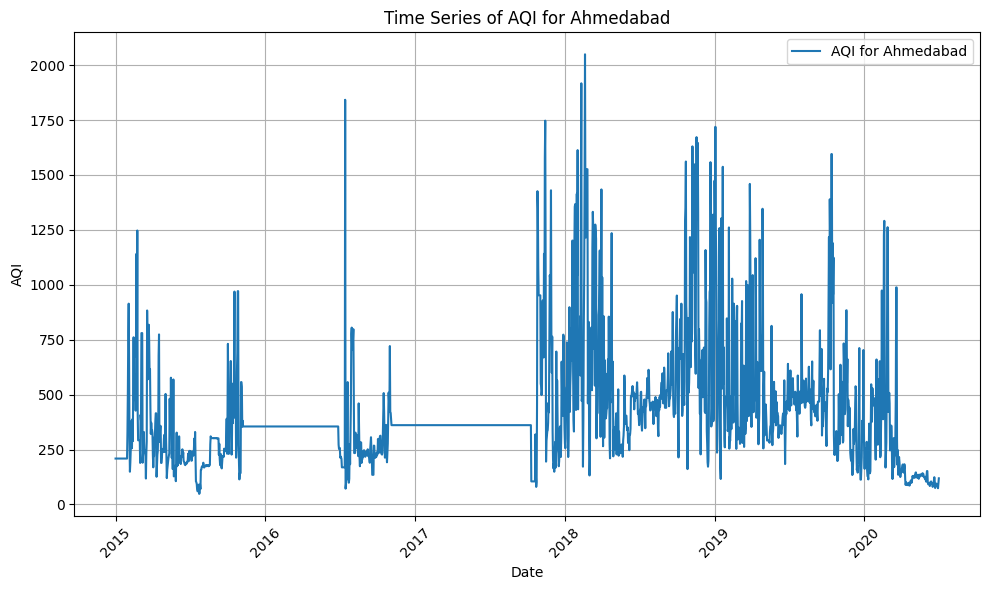

In [ ]:
import matplotlib.pyplot as plt
df_reset = df.reset_index()
df_reset['Date'] = pd.to_datetime(df_reset['Date'])
city = 'Ahmedabad' 
city_data = df_reset[df_reset['City'] == city]

plt.figure(figsize=(10, 6))
plt.plot(city_data['Date'], city_data['AQI'], label=f'AQI for {city}')
plt.title(f'Time Series of AQI for {city}')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Divyanshi Singh\AppData\Local\Temp\ipykernel_19932\4271576332.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_aqi = df_reset.resample('M')['AQI'].mean()


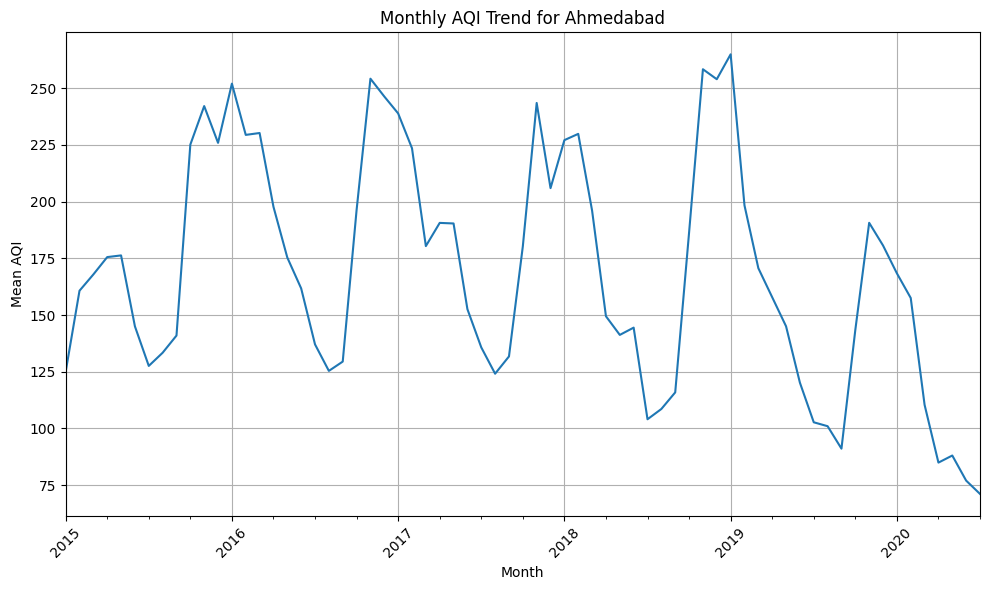

In [30]:
df_reset.set_index('Date', inplace=True)

# Resample by month and calculate mean AQI
monthly_aqi = df_reset.resample('M')['AQI'].mean()

# Plotting 
plt.figure(figsize=(10, 6))
monthly_aqi.plot()
plt.title(f'Monthly AQI Trend for {city}')
plt.xlabel('Month')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


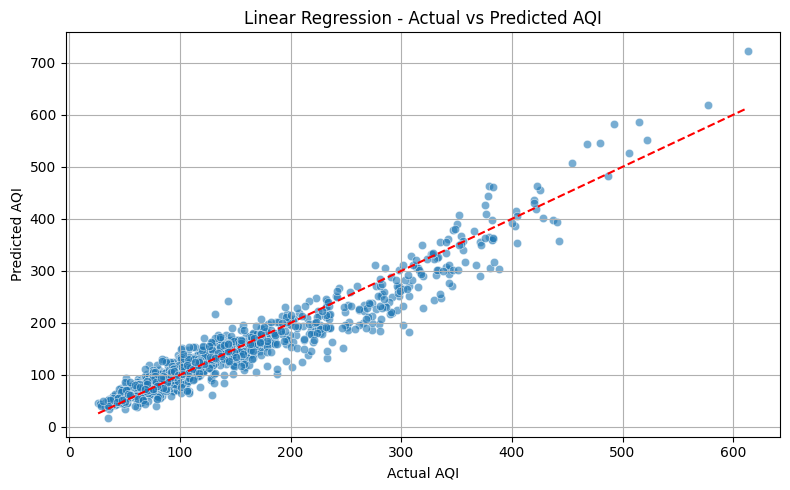

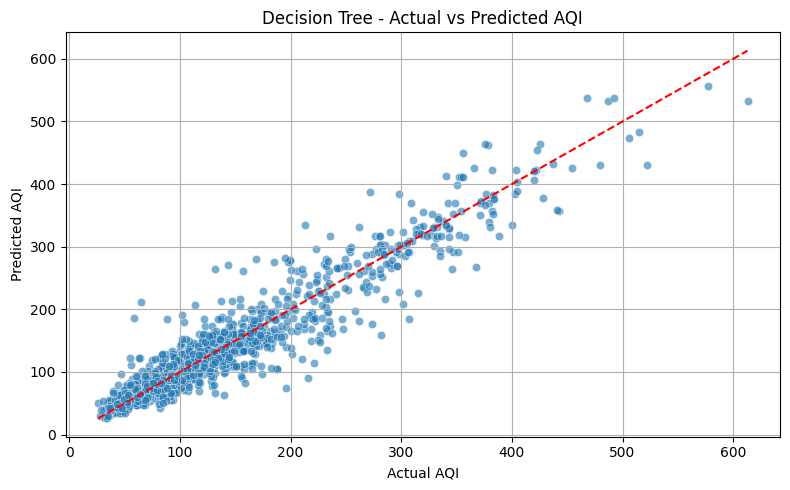

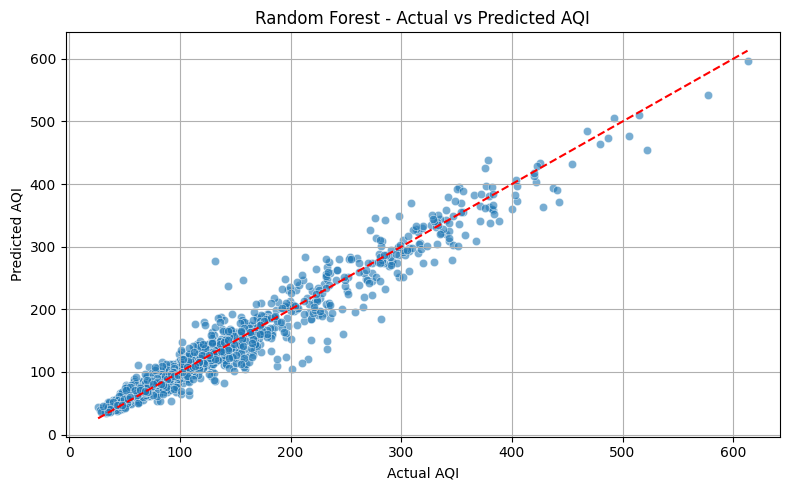


📊 Model Performance Summary:

               Model     MSE    MAE  R² Score  Accuracy (%)
2      Random Forest  423.95  13.87      0.95         88.84
0  Linear Regression  651.36  18.15      0.92         85.19
1      Decision Tree  851.96  19.73      0.90         84.22


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('city_day.csv')
# Filter required features and drop rows with missing values
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene','NO','NOx','NH3','Toluene','Xylene']
data = data[features + ['AQI']].dropna()

# Split into features and target
X = data[features]
y = data['AQI']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Helper for MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - mape

    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R² Score': r2,
        'Accuracy (%)': accuracy
    })

    # Plot predictions
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual AQI')
    plt.ylabel('Predicted AQI')
    plt.title(f'{name} - Actual vs Predicted AQI')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Summary table
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:\n")
print(results_df.sort_values(by='R² Score', ascending=False).round(2))



In [32]:
import joblib
#Save Random Forest(best accuracy)
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')


['random_forest_model.pkl']

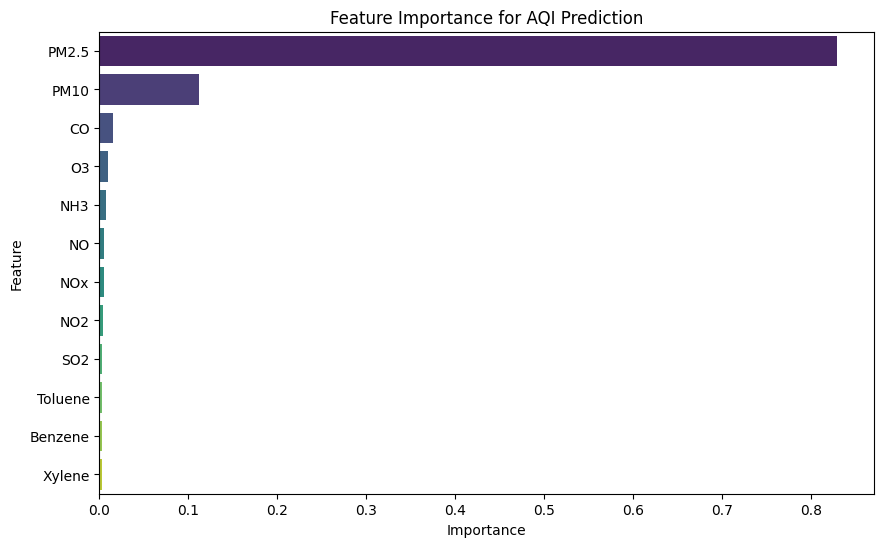

In [33]:
rf_model = joblib.load('random_forest_model.pkl')
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance for AQI Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_best_rf)
mae = mean_absolute_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)
mape = np.mean(np.abs((y_test - y_pred_best_rf) / y_test)) * 100
accuracy = 100 - mape

print("\n📊 Tuned Random Forest Performance:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

📊 Tuned Random Forest Performance:
MSE: 425.28
MAE: 13.80
R² Score: 0.9489
Accuracy: 88.93%


In [ ]:
# Save the model
joblib.dump(best_rf_model, 'aqi_prediction_model.pkl')
# Load the model (for future use)
loaded_model = joblib.load('aqi_prediction_model.pkl')

In [37]:
# Example: Predict on new data
new_data = pd.DataFrame({
    'PM2.5': [50],
    'PM10': [100],
    'NO2': [20],
    'SO2': [10],
    'CO': [10],
    'O3': [30],
    'Benzene' :[20],
    'NO' :[30],
    'NOx':[40],
    'NH3':[20],
    'Toluene':[20],
    'Xylene':[10]
})

predicted_aqi = best_rf_model.predict(new_data)
print("Predicted AQI:", predicted_aqi[0])

Predicted AQI: 195.95315494228


TIME SERIES ANALYSIS


In [ ]:
df = pd.read_csv('city_day.csv')

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter for years
train_df = df[df['Date'].dt.year < 2020]      # 2015 to 2019
test_df = df[df['Date'].dt.year == 2020]      # Only 2020

# Select only required features
#features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene','NO','NOx','NH3','Toluene','Xylene']
target = 'AQI'

# Drop rows with all pollutant values missing
train_df = train_df.dropna(subset=features, how='all')
test_df = test_df.dropna(subset=features, how='all')

# Forward and backward fill pollutant values
train_df[features] = train_df[features].ffill().bfill()
test_df[features] = test_df[features].ffill().bfill()

# Drop rows with missing AQI (if any)
train_df = train_df.dropna(subset=[target])
test_df = test_df.dropna(subset=[target])

# Train/test split
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]
df_reset = df.reset_index()
print(df_reset.columns)

Index(['index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [25]:
traindf_reset = train_df.reset_index()
print(traindf_reset.columns)

Index(['index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [26]:
testdf_reset = test_df.reset_index()
print(testdf_reset.columns)

Index(['index', 'City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3',
       'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [27]:
# Set 'Date' as the index
traindf_reset.set_index('Date', inplace=True)
testdf_reset.set_index('Date', inplace=True)

In [28]:
# Sort the data by date
traindf_reset.sort_index(inplace=True)
testdf_reset.sort_index(inplace=True)
# Display the first few rows
print(traindf_reset.head())
print(testdf_reset.head())

            index   City   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
Date                                                                            
2015-01-01  10229  Delhi  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
2015-01-02  10230  Delhi  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
2015-01-03  10231  Delhi   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
2015-01-04  10232  Delhi  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
2015-01-05  10233  Delhi  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

             SO2     O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
Date                                                                 
2015-01-01  9.25  41.68    14.36    24.86    9.84  472.0     Severe  
2015-01-02  6.65  29.97    10.55    20.09    4.29  454.0     Severe  
2015-01-03  2.65  19.71     3.91    10.23    1.99  143.0   Moderate  
2015-01-04  4.63  25.36     4.26     9.71    3.34  319.0  Very Poor  
2015-01-05  

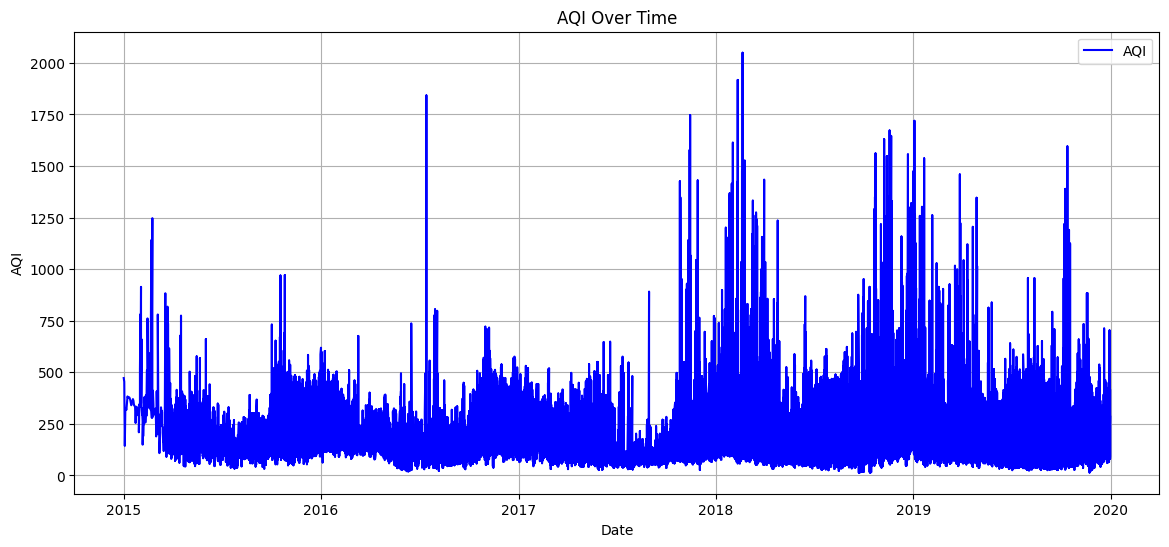

In [ ]:
# Plot AQI over time
plt.figure(figsize=(14, 6))
plt.plot(traindf_reset.index, traindf_reset['AQI'], label='AQI', color='blue')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

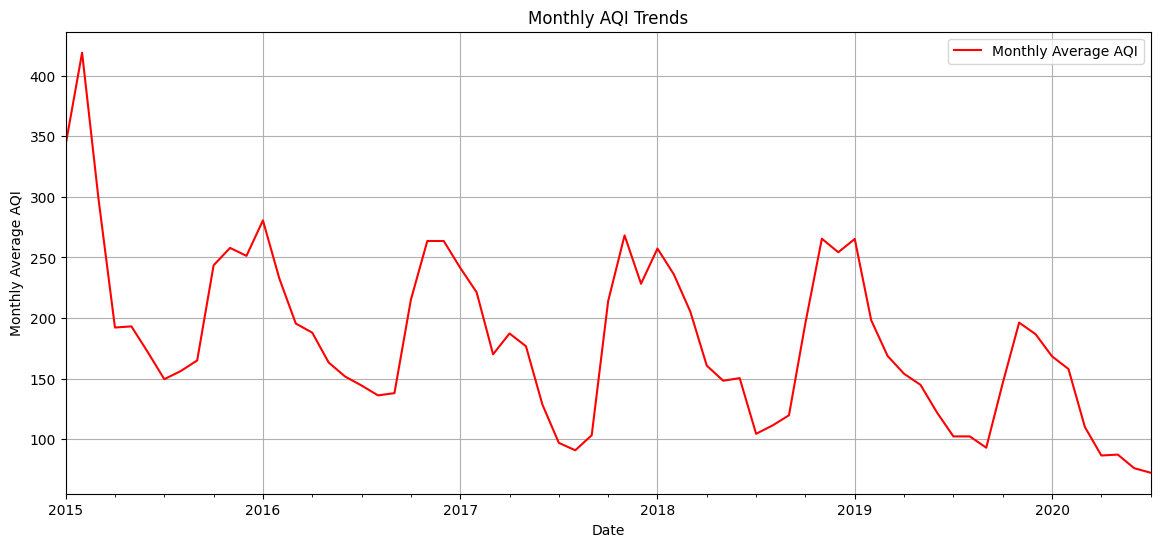

In [30]:
# Resample by month and calculate mean AQI
df_reset = df_reset.set_index('Date')  # Set Date as index
monthly_aqi = df_reset['AQI'].resample('ME').mean()

# Plot monthly AQI trends
plt.figure(figsize=(14, 6))
monthly_aqi.plot(label='Monthly Average AQI', color='red')
plt.title('Monthly AQI Trends')
plt.xlabel('Date')
plt.ylabel('Monthly Average AQI')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

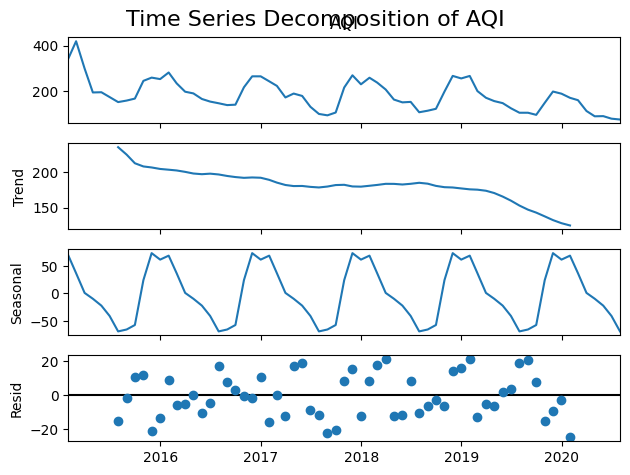

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_aqi.dropna(), model='additive', period=12)  # Period=12 for yearly seasonality

# Plot the decomposition
fig=plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Time Series Decomposition of AQI', fontsize=16)

# Adjust x-axis label
for ax in fig.get_axes():
    ax.set_xlabel('Date', fontsize=10)  # Rename x-axis to 'Date' for each plot

plt.show()

In [32]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(monthly_aqi.dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Interpret the results
if adf_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -0.3904701819154713
p-value: 0.9116777975869133
The time series is non-stationary.


In [41]:
data=monthly_aqi.dropna()
diff_data = data.diff().dropna()

In [44]:
result = adfuller(diff_data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")

ADF Statistic: -7.453675650361956
p-value: 5.584550835152564e-11
The time series is stationary.


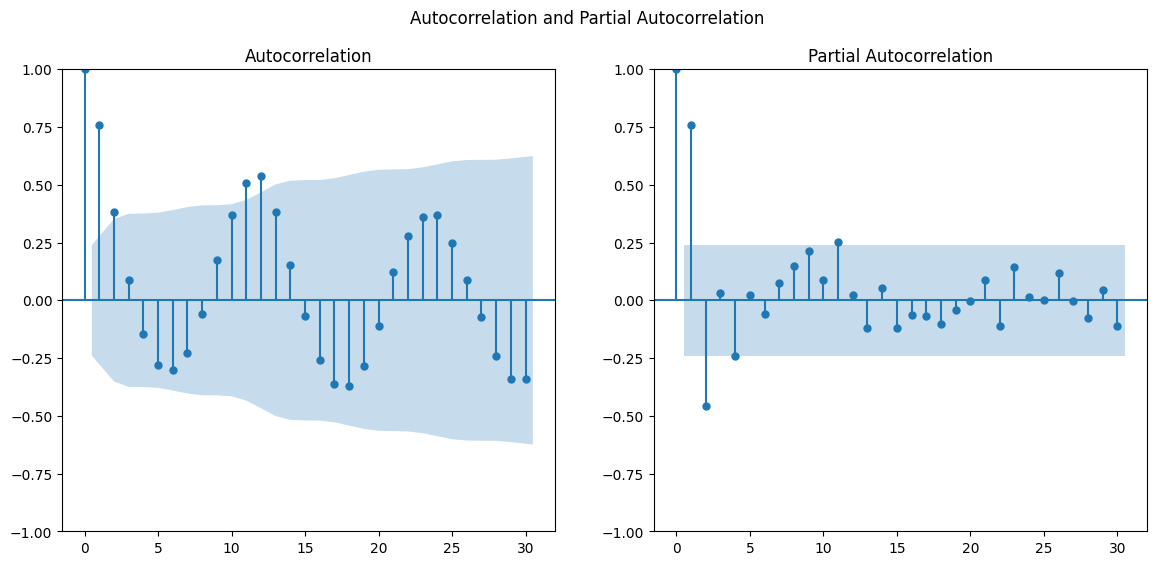

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plot_acf(monthly_aqi.dropna(), lags=30, ax=plt.subplot(121))
plot_pacf(monthly_aqi.dropna(), lags=30, ax=plt.subplot(122))
plt.suptitle('Autocorrelation and Partial Autocorrelation')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                   67
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -333.283
Date:                Thu, 24 Apr 2025   AIC                            678.567
Time:                        23:58:59   BIC                            691.795
Sample:                    01-31-2015   HQIC                           683.801
                         - 07-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        180.5952     13.593     13.286      0.000     153.953     207.237
ar.L1          1.4221      0.298      4.777      0.000       0.839       2.006
ar.L2         -0.6355      0.194     -3.272      0.0

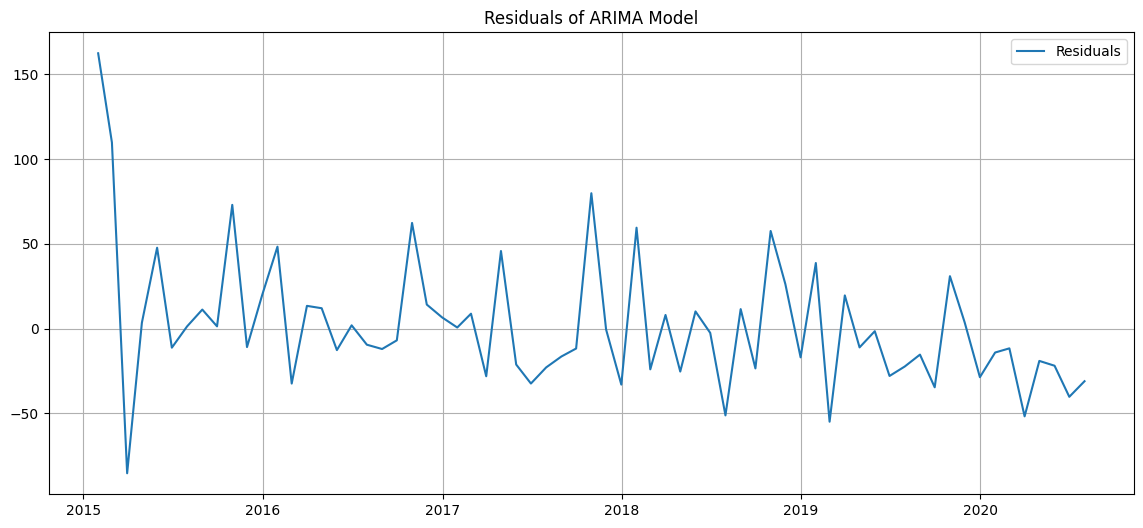

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Fit ARIMA model
model = ARIMA(monthly_aqi.dropna(), order=(2, 0, 2))  # Example order (p, d, q)
results = model.fit()

#Summary of the model
print(results.summary())
arima_forecast = results.forecast(steps=1)

#CALCULATE RESIDUALS
residuals = results.resid

# Plot residuals
plt.figure(figsize=(14, 6))
plt.plot(results.resid, label='Residuals')
plt.title('Residuals of ARIMA Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions (in-sample)
predictions = results.fittedvalues

# Actual values (aligned)
actual = monthly_aqi.dropna()

# Error metrics
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predictions)
mape = np.mean(np.abs((actual - predictions) / actual)) * 100
r2 = r2_score(actual, predictions)

# Print error metrics
print("\n📊 ARIMA Model Performance Metrics:\n")
print(f"MSE   : {mse:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"MAE   : {mae:.2f}")
print(f"MAPE  : {mape:.2f}%")
print(f"R²    : {r2:.4f}")


📊 ARIMA Model Performance Metrics:

MSE   : 1548.37
RMSE  : 39.35
MAE   : 27.86
MAPE  : 16.02%
R²    : 0.6624


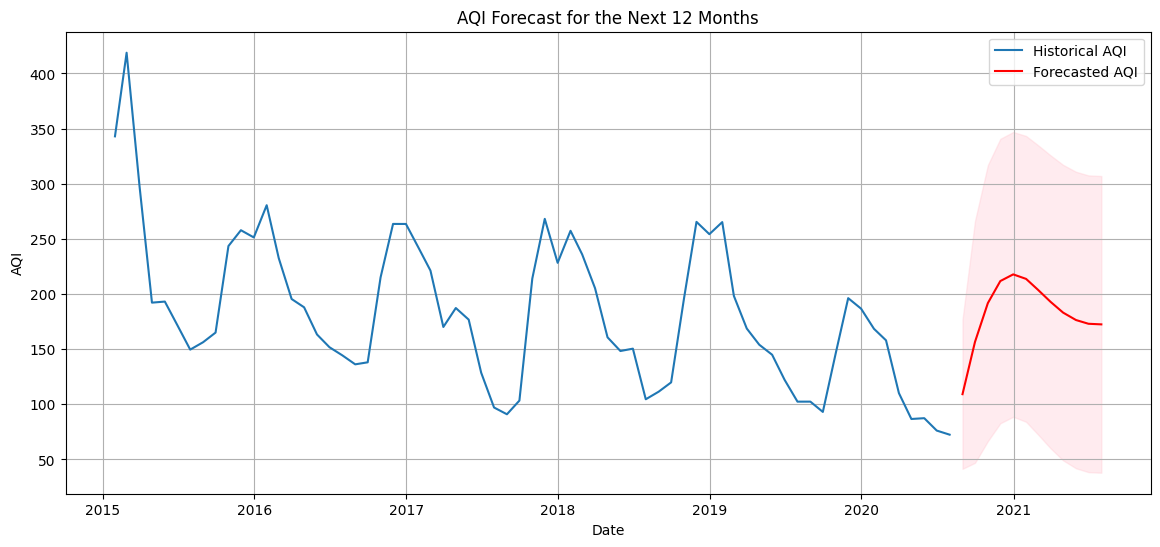

In [48]:
# Forecast for the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(monthly_aqi.index[-1], periods=forecast_steps + 1, freq='M')[1:]
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(monthly_aqi.index, monthly_aqi, label='Historical AQI')
plt.plot(forecast_index, forecast_values, label='Forecasted AQI', color='red')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('AQI Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

**LSTM**

In [84]:
from sklearn.preprocessing import StandardScaler

# Filter required features and drop rows with missing values
#features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Benzene','NO','NOx','NH3','Toluene','Xylene']
df = df[features + ['AQI']].dropna()

# Split into features and target
X = df[features]
y = df['AQI']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
X_train_tensor = Variable(torch.Tensor(x_train))
X_test_tensor = Variable(torch.Tensor(x_test))

Y_train_tensor = Variable(torch.Tensor(y_train))
Y_test_tensor = Variable(torch.Tensor(y_test))

X_train_tensor = torch.reshape(X_train_tensor, (X_train_tensor.shape[0], 1, X_train_tensor.shape[1]))
X_test_tensor = torch.reshape(X_test_tensor, (X_test_tensor.shape[0], 1, X_test_tensor.shape[1]))

class LSTM(nn.Module):
    def __init__(self, num_features, hidden_size, num_layers, output_size, dropout=0.3):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=num_features, hidden_size=hidden_size,
                            num_layers=num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

num_features = X_train_tensor.shape[2]
hidden_size = 32
num_layers = 2
output_size = 1
dropout = 0.3

lstm1 = LSTM(num_features, hidden_size, num_layers, output_size, dropout)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=0.001)  # reduced learning rate

epochs = 100
best_loss = float("inf")
patience = 20
trigger_times = 0
train_losses = []
val_losses = []

for epoch in range(epochs):
    lstm1.train()
    optimizer.zero_grad()

    outputs = lstm1(X_train_tensor)
    loss = loss_fn(outputs, Y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation loss
    lstm1.eval()
    with torch.no_grad():
        val_outputs = lstm1(X_test_tensor)
        val_loss = loss_fn(val_outputs, Y_test_tensor)
    
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        # print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.5f}")
        print(f"Epoch [{epoch}/{epochs}], Train Loss: {loss.item():.5f}, Validation Loss: {val_loss.item():.5f}")

    # Early stopping logic
    if val_loss.item() < best_loss:
        best_loss = val_loss.item()
        trigger_times = 0
        torch.save(lstm1.state_dict(), "best_lstm_model.pth")
    else:
        trigger_times += 1
        if trigger_times > patience:
            print(f"Early stopping at epoch {epoch}")
            break

Epoch [0/100], Train Loss: 0.99947, Validation Loss: 0.95455
Epoch [10/100], Train Loss: 0.94210, Validation Loss: 0.89780
Epoch [20/100], Train Loss: 0.85055, Validation Loss: 0.80534
Epoch [30/100], Train Loss: 0.69844, Validation Loss: 0.65072
Epoch [40/100], Train Loss: 0.48359, Validation Loss: 0.44898
Epoch [50/100], Train Loss: 0.31029, Validation Loss: 0.29021
Epoch [60/100], Train Loss: 0.24132, Validation Loss: 0.23398
Epoch [70/100], Train Loss: 0.21152, Validation Loss: 0.20449
Epoch [80/100], Train Loss: 0.18071, Validation Loss: 0.17135
Epoch [90/100], Train Loss: 0.15664, Validation Loss: 0.14863


R2 SCORE is 0.8626439571380615
Root mean squared error of is 33.805782
Mean Absolute error is 23.682045


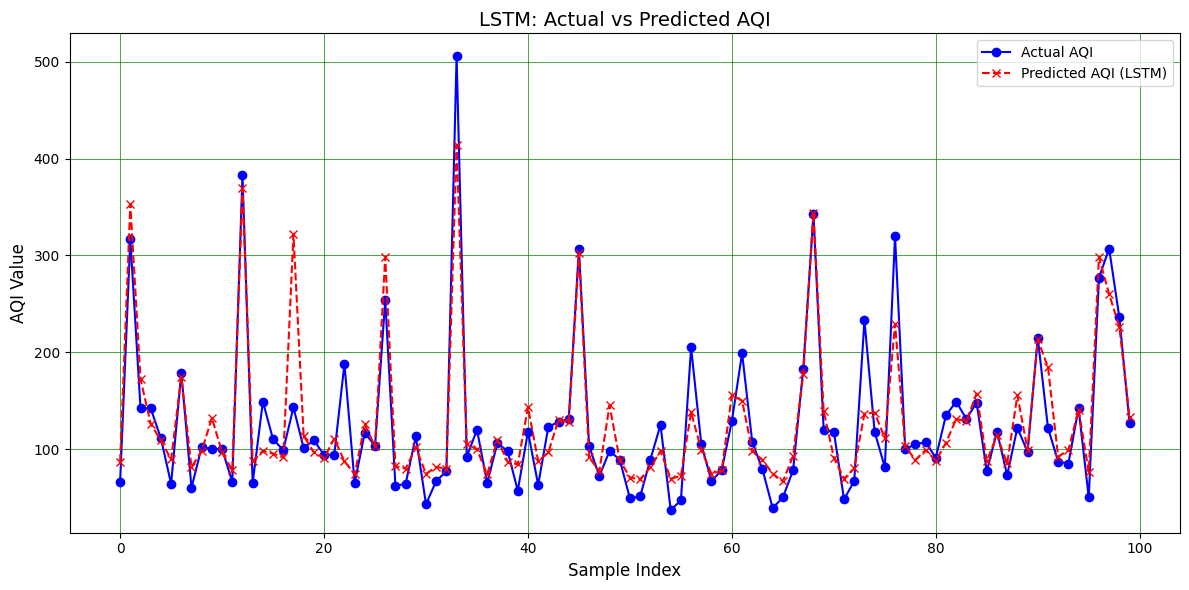

In [95]:
lstm1.eval()
test_predict = lstm1(X_test_tensor)

# Convert predictions and actual to NumPy
data_predict = test_predict.data.numpy()
data_predict = sc_y.inverse_transform(data_predict)

data_actual = Y_test_tensor.data.numpy()
data_actual = sc_y.inverse_transform(data_actual)

score = r2_score(data_actual, data_predict)
rmean_error = np.sqrt(mean_squared_error(data_actual, data_predict))
mae = mean_absolute_error(data_actual, data_predict)
print("R2 SCORE is", score)
print("Root mean squared error of is",rmean_error)
print("Mean Absolute error is", mae)

# Ensure both arrays are NumPy and flattened
actual_lstm = data_actual.flatten()
predicted_lstm = data_predict.flatten()

# Create a DataFrame for a sample range (e.g., 100 to 200)
lstm_df = pd.DataFrame({
    'Actual': actual_lstm[100:200],
    'Predicted': predicted_lstm[100:200]
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(lstm_df.index, lstm_df['Actual'], label='Actual AQI', marker='o', linestyle='-', color='blue')
plt.plot(lstm_df.index, lstm_df['Predicted'], label='Predicted AQI (LSTM)', marker='x', linestyle='--', color='red')

# Graph details
plt.title('LSTM: Actual vs Predicted AQI', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('AQI Value', fontsize=12)

plt.legend()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tight_layout()
plt.show()